In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("crop yield data sheet.xlsx")
df.head()

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,1230.0,80.0,28,80.0,24.0,20.0,12.0
1,480.0,60.0,36,70.0,20.0,18.0,8.0
2,1250.0,75.0,29,78.0,22.0,19.0,11.0
3,450.0,65.0,35,70.0,19.0,18.0,9.0
4,1200.0,80.0,27,79.0,22.0,19.0,11.0


# data preprocessing 

In [3]:
df.shape

(109, 7)

In [4]:
df.dtypes

Rain Fall (mm)    float64
Fertilizer        float64
Temperatue         object
Nitrogen (N)      float64
Phosphorus (P)    float64
Potassium (K)     float64
Yeild (Q/acre)    float64
dtype: object

In [5]:
df['Temperatue'].unique()

array([28, 36, 29, 35, 27, 34, 37, 39, 26, 38, 24, 25, 40, nan, ':'],
      dtype=object)

In [6]:
df = df[df['Temperatue'] != ':']

In [7]:
df['Temperatue'] = df['Temperatue'].astype(float)

In [8]:
df.isnull().sum()

Rain Fall (mm)    9
Fertilizer        9
Temperatue        9
Nitrogen (N)      9
Phosphorus (P)    9
Potassium (K)     9
Yeild (Q/acre)    9
dtype: int64

In [9]:
columns = [df.columns]
for col in columns:
    df[col]=df[col].fillna(df[col].median())

In [10]:
df.describe()


,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,874.814815,67.990741,32.111111,70.759259,21.120370,18.138889,9.046296
std,391.818744,9.616473,5.277944,6.390516,1.868167,1.758601,1.881460
min,400.000000,50.000000,24.000000,59.000000,18.000000,15.000000,5.500000
25%,450.000000,60.000000,28.000000,65.000000,20.000000,16.000000,7.000000
50%,1150.000000,70.000000,29.000000,71.000000,21.000000,19.000000,9.000000
75%,1226.250000,77.000000,38.000000,76.250000,23.000000,19.000000,11.000000
max,1300.000000,80.000000,40.000000,80.000000,25.000000,22.000000,12.000000


In [11]:
df.head()

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,1230.0,80.0,28.0,80.0,24.0,20.0,12.0
1,480.0,60.0,36.0,70.0,20.0,18.0,8.0
2,1250.0,75.0,29.0,78.0,22.0,19.0,11.0
3,450.0,65.0,35.0,70.0,19.0,18.0,9.0
4,1200.0,80.0,27.0,79.0,22.0,19.0,11.0


<Axes: xlabel='Rain Fall (mm)', ylabel='Count'>

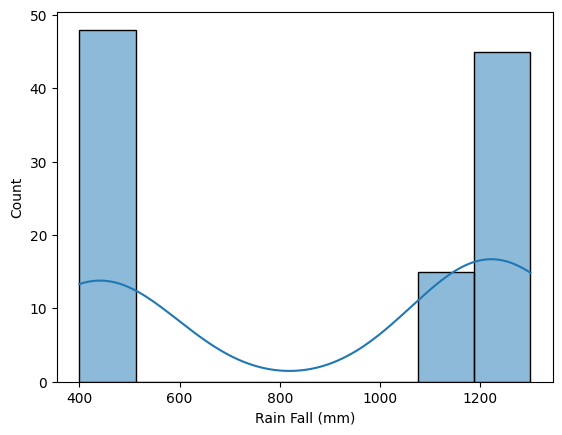

In [12]:
sns.histplot(x='Rain Fall (mm)',data = df,kde=True)

<Axes: xlabel='Fertilizer', ylabel='Count'>

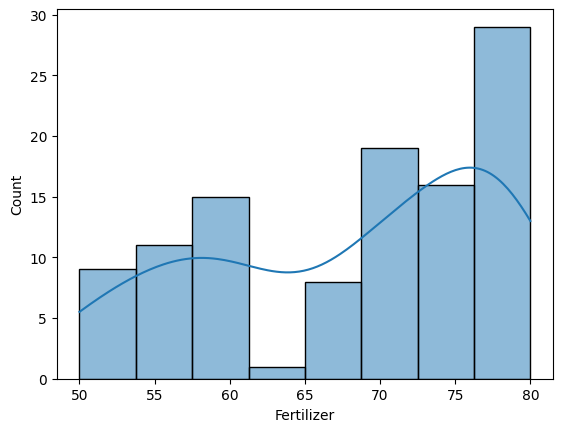

In [13]:
sns.histplot(x = "Fertilizer",data = df, kde = True )

# sns.histplot(x = "Fertilizer", data = df, kde = True)

<Axes: xlabel='Temperatue', ylabel='Count'>

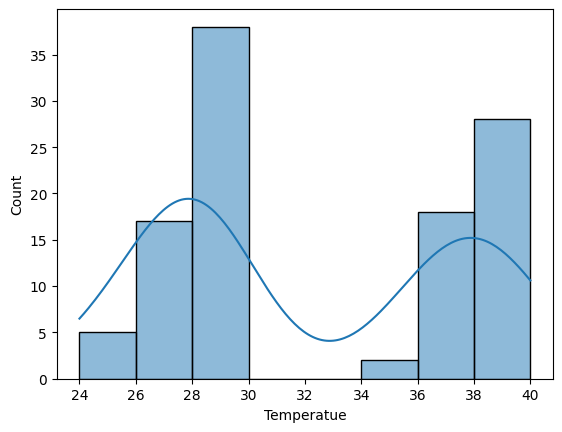

In [14]:
sns.histplot(x='Temperatue',data = df, kde = True)

<Axes: xlabel='Potassium (K)', ylabel='Count'>

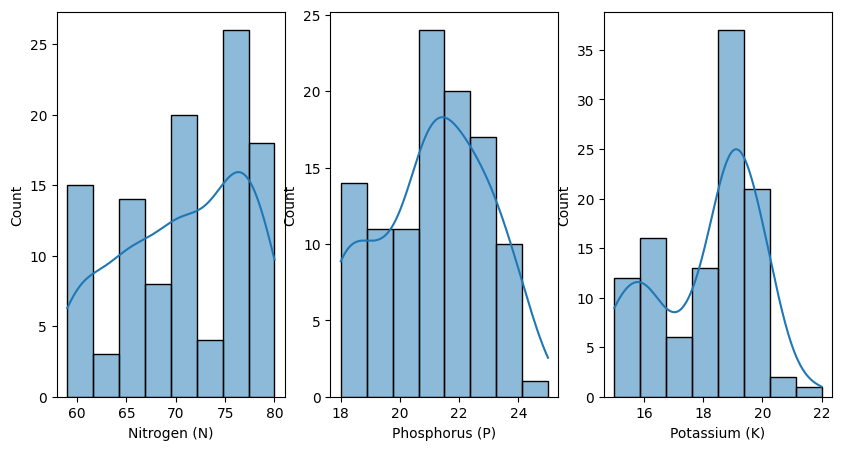

In [15]:
fig, ax = plt.subplots(1,3,figsize=(10,5))
sns.histplot(x='Nitrogen (N)',data =df,kde=True, ax = ax[0])

sns.histplot(x='Phosphorus (P)',data = df, kde = True, ax = ax[1])
sns.histplot(x = "Potassium (K)", data = df, kde = True, ax = ax[2])


<Axes: xlabel='Yeild (Q/acre)', ylabel='Count'>

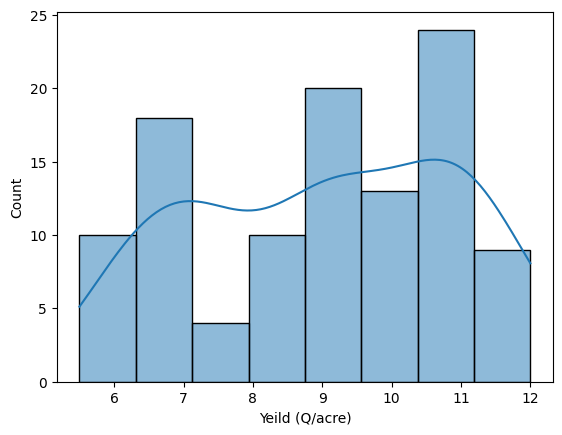

In [16]:
sns.histplot(x='Yeild (Q/acre)',data = df,kde=True)

<Axes: xlabel='Rain Fall (mm)', ylabel='Yeild (Q/acre)'>

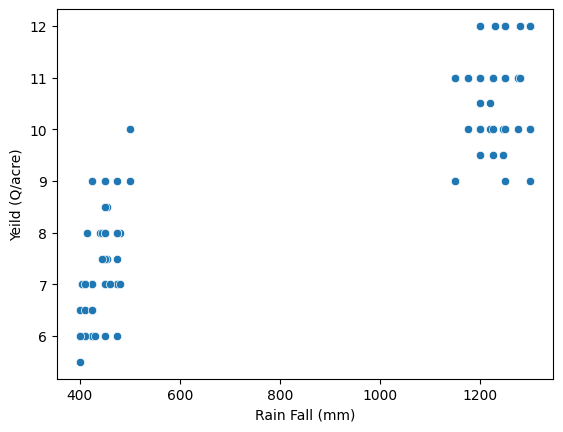

In [17]:
sns.scatterplot(x='Rain Fall (mm)',y='Yeild (Q/acre)',data=df)

<Axes: xlabel='Fertilizer', ylabel='Yeild (Q/acre)'>

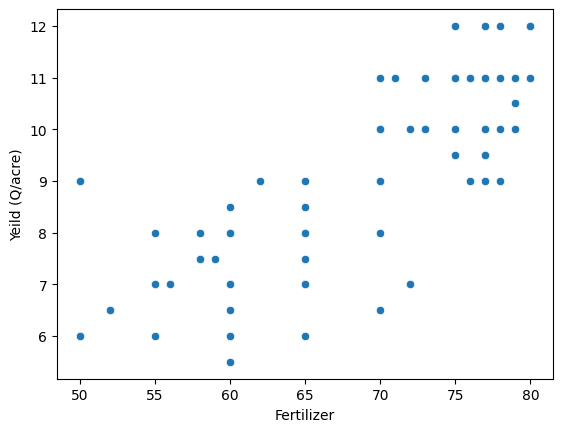

In [18]:
sns.scatterplot(x='Fertilizer',y='Yeild (Q/acre)',data =df)

<Axes: xlabel='Temperatue', ylabel='Yeild (Q/acre)'>

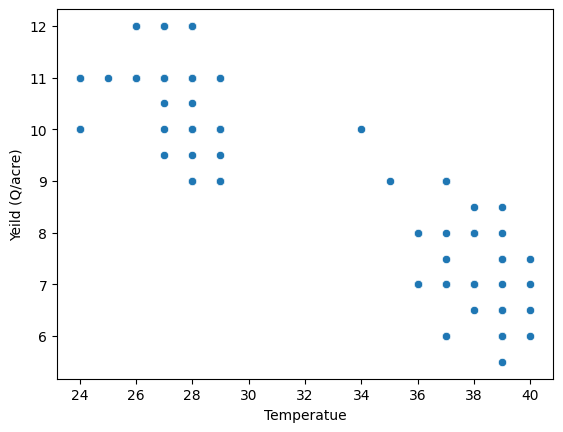

In [19]:
sns.scatterplot(x='Temperatue',y='Yeild (Q/acre)',data =df
               )

<Axes: xlabel='Potassium (K)', ylabel='Yeild (Q/acre)'>

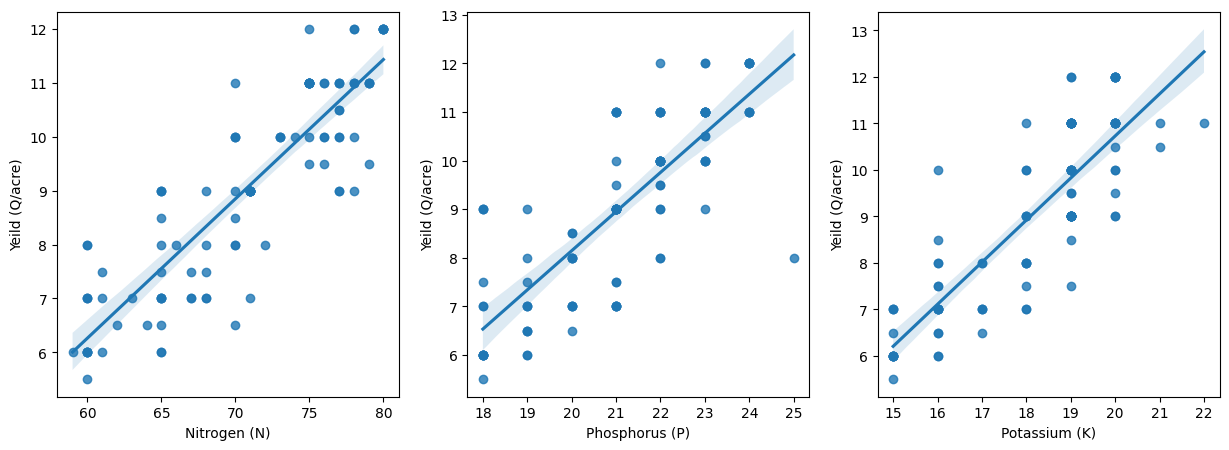

In [20]:
fig, ax = plt.subplots(1,3,figsize=(15, 5))
sns.regplot(x = 'Nitrogen (N)', y = 'Yeild (Q/acre)', data = df, ax = ax[0])
sns.regplot(x = 'Phosphorus (P)', y = 'Yeild (Q/acre)', data = df, ax = ax[1])
sns.regplot(x = 'Potassium (K)', y = 'Yeild (Q/acre)', data = df, ax = ax[2])

<Axes: >

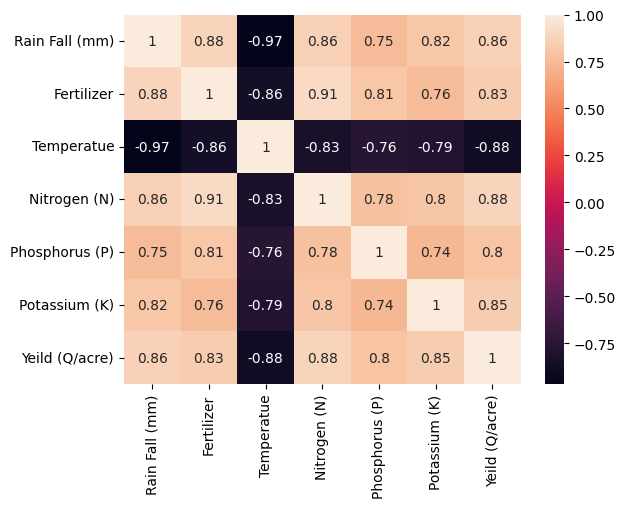

In [21]:
sns.heatmap(df.corr(),annot = True)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(df.drop('Yeild (Q/acre)', axis = 1), 
df['Yeild (Q/acre)'], test_size = 0.2, random_state = 42)

In [25]:
from sklearn.tree import DecisionTreeRegressor

#Decision Tree Regressor object
dtr = DecisionTreeRegressor()

In [26]:
from sklearn.model_selection import GridSearchCV

#parameters for grid search
para = {
    "max_depth": [2,4,6,8],
    "min_samples_split": [2,4,6,8],
    "min_samples_leaf": [2,4,6,8],
    "random_state": [0,42]
}

#Grid search object
grid = GridSearchCV(dtr, para, cv = 5, n_jobs = -1, verbose = 1)

#fitting the grid search object
grid.fit(X_train, y_train)

#best parameters
print(grid.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 8, 'random_state': 0}


In [27]:
#decision tree regressor with best parameters
dtr = DecisionTreeRegressor(max_depth = 4, min_samples_leaf = 2, min_samples_split = 8, random_state = 0)

#fitting the model
dtr.fit(X_train, y_train)

#training score
print(dtr.score(X_train, y_train))

#prediction
d_pred = dtr.predict(X_test)

0.9279431916668135


In [28]:
from sklearn.ensemble import RandomForestRegressor

#Random Forest Regressor object
rfr = RandomForestRegressor()

In [29]:
from sklearn.model_selection import GridSearchCV

#parameters for grid search
para = {
    "n_estimators": [100,200,300],
    "max_depth": [2,4,6,8],
    "min_samples_split": [2,4,6,8],
    "min_samples_leaf": [2,4,6,8],
    "random_state": [0,42]
}

#Grid search object
grid = GridSearchCV(rfr, para, cv = 5, n_jobs = -1, verbose = 1)

#fitting the grid search object
grid.fit(X_train, y_train)

#best parameters
print(grid.best_params_)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 100, 'random_state': 42}


In [30]:
#Random Forest Regressor with best parameters
rfr = RandomForestRegressor(max_depth = 4, min_samples_leaf = 2, min_samples_split = 6, n_estimators = 100, random_state = 42)

#fitting the model
rfr.fit(X_train, y_train)

#training score
print(rfr.score(X_train, y_train))

#prediction
r_pred = rfr.predict(X_test)

0.9355014219068669


C:\Users\Dell\AppData\Local\Temp\ipykernel_11516\2078236009.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, ax = ax[0]).set_title('Decision Tree Regressor')
C:\Users\Dell\AppData\Local\Temp\ipykernel_11516\2078236009.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d_pred, ax = ax

<Axes: title={'center': 'Random Forest Regressor'}, xlabel='Yeild (Q/acre)', ylabel='Density'>

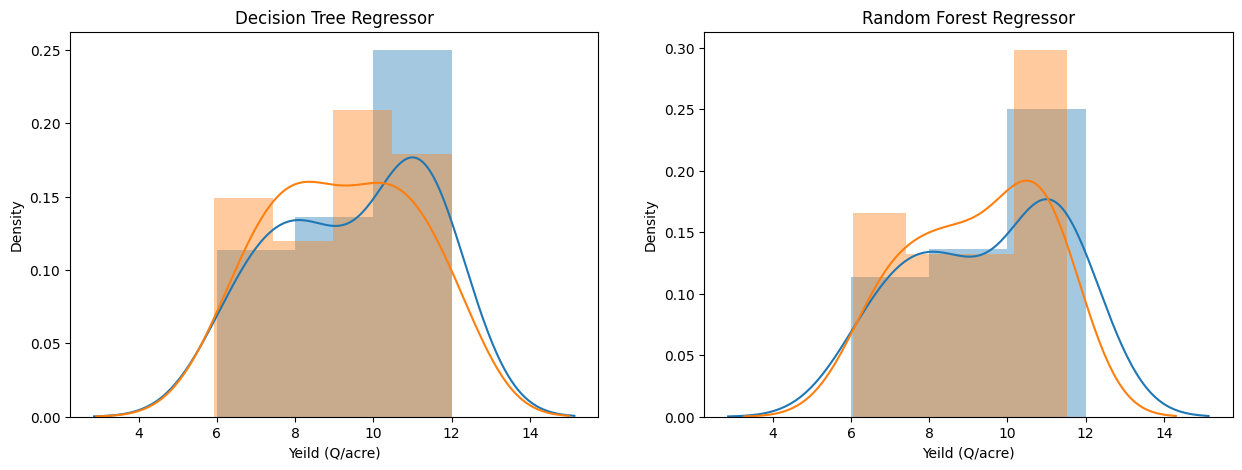

In [36]:
fig, ax = plt.subplots(1,2,figsize=(15, 5))

#plotting the actual vs predicted values for decision tree regressor
sns.distplot(y_test, ax = ax[0]).set_title('Decision Tree Regressor')
sns.distplot(d_pred, ax = ax[0])

#plotting the actual vs predicted values for random forest regressor
sns.distplot(y_test, ax = ax[1]).set_title('Random Forest Regressor')
sns.distplot(r_pred, ax = ax[1])


In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Decision Tree Regressor")
print("Mean Squared Error: ", mean_squared_error(y_test, d_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, d_pred))
print("R2 Score: ", r2_score(y_test, d_pred))
print("\n")
print("Random Forest Regressor")
print("Mean Squared Error: ", mean_squared_error(y_test, r_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, r_pred))
print("R2 Score: ", r2_score(y_test, r_pred))

Decision Tree Regressor
Mean Squared Error:  0.8250555099243105
Mean Absolute Error:  0.6832293523469994
R2 Score:  0.7709296619513172


Random Forest Regressor
Mean Squared Error:  0.7108302219107439
Mean Absolute Error:  0.6836246853366845
R2 Score:  0.8026434375994264


Text(0.5, 1.0, 'Random Forest Regressor')

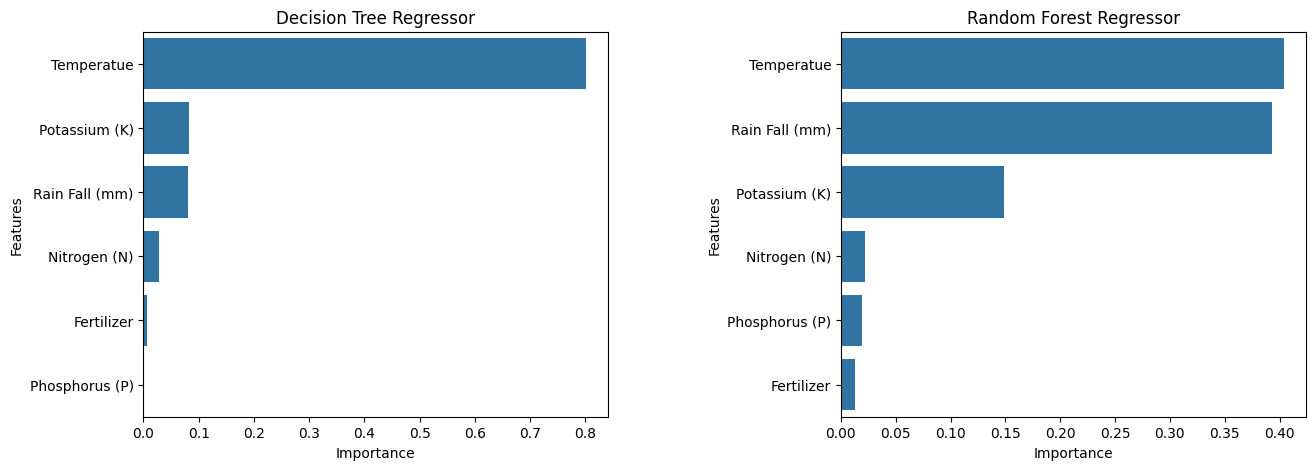

In [33]:
fig, ax = plt.subplots(1,2,figsize=(15, 5))
fig.subplots_adjust(wspace=0.5)

#Decision Tree Regressor
feature_df = pd.DataFrame({'Features':X_train.columns, 'Importance':dtr.feature_importances_})
feature_df.sort_values(by='Importance', ascending=False, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_df, ax = ax[0]).set_title('Decision Tree Regressor')

#Random Forest Regressor
feature_df = pd.DataFrame({'Features':X_train.columns, 'Importance':rfr.feature_importances_})
feature_df.sort_values(by='Importance', ascending=False, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_df, ax = ax[1]).set_title('Random Forest Regressor')